# In which Pittsburgh Neighborhood will you live the longest?

By: Samarth Bhardwaj

## Introduction

My goal is to determine which neighborhood in Pittsburgh you will live the longest. The datset I used is the COVID-19 Vaccinations per neigborhood. Link: https://data.wprdc.org/dataset/allegheny-county-covid-19-vaccinations/resource/96cf8cdc-2b8e-43cb-b20b-443f236bcc60

I believe that the area with the highest COVID-19 vaccination rates shows us that more people are aware of the disease spreading and are taking action to protect themselves from it, lowering the chance of them getting it and spreading it. The higher the rate is, the better the neighborhood is to live in. 

### Cleaning the data

For the project, I did not want to use neighborhoods that have a very low population, because this would skew results and would not truly be an accurate representation of the overall neighborhoods. 

I removed neigborhoods that have a low partial + fully vaccinated population (under 10 people).

In [32]:
# Select rows where neighborhood_municipality is not McDonald or Trafford
df = df.loc[~df['neighborhood_municipality'].isin(['Mcdonald', 'Trafford'])]

# Reset the index
df = df.reset_index(drop=True)

## COVID Vaccinations per Neigborhood

***** For my dataset, I combined vaccinated and vaccinated with booster to show overall vaccination rates in neighborhoods *****

I first looked at all the top 5 neighborhoods with fully vaccinated people with booster shots:

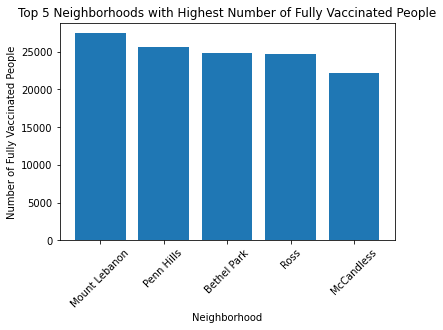

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vaccinations.csv')

# Calculate the total number of fully vaccinated people with booster shots for each neighborhood
df['total_fully_vaccinated_w_booster'] = df['total_fully_vaccinated'] + df['total_fully_vaccinated_w_booster']
neighborhood_boosted = df[['neighborhood_municipality', 'total_fully_vaccinated_w_booster']].sort_values(by='total_fully_vaccinated_w_booster', ascending=False).head(5)

# Create a bar plot of the top 5 neighborhoods
plt.bar(neighborhood_boosted['neighborhood_municipality'], neighborhood_boosted['total_fully_vaccinated_w_booster'])

# Set the x-axis label and rotate the labels to be more readable
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Number of Fully Vaccinated People')

# Set the plot title
plt.title('Top 5 Neighborhoods with Highest Number of Fully Vaccinated People')

# Show the plot
plt.show()

Penn Hills has the highest number of fully vaccinated people with booster shots. 

### Here is a Bar Graph of the Top 5 Lowest Number of Fully Vaccinated People with Booster Shots:

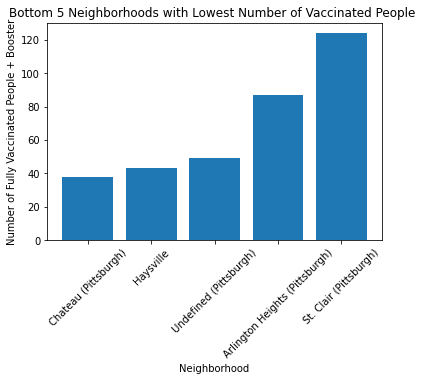

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('vaccinations.csv')

# Select rows where neighborhood_municipality is not McDonald or Trafford
df = df.loc[~df['neighborhood_municipality'].isin(['Mcdonald', 'Trafford'])]

# Reset the index
df = df.reset_index(drop=True)

# Calculate the total number of fully vaccinated people with booster shots for each neighborhood
df['total_fully_vaccinated_w_booster'] = df['total_fully_vaccinated'] + df['total_fully_vaccinated_w_booster']
lowest_vaccinations = df[['neighborhood_municipality', 'total_fully_vaccinated_w_booster']].sort_values(by='total_fully_vaccinated_w_booster').head(5)

# Create a bar plot of the lowest 5 neighborhoods
plt.bar(lowest_vaccinations['neighborhood_municipality'], lowest_vaccinations['total_fully_vaccinated_w_booster'])

# Set the x-axis label and rotate the labels to be more readable
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Number of Fully Vaccinated People + Booster')

# Set the plot title
plt.title('Bottom 5 Neighborhoods with Lowest Number of Vaccinated People ')

# Show the plot
plt.show()


St. Clair has the lowest number of vaccinated people at a little over 120 people.

### I then realized that each neighborhood has different amount of people, so I needed to calculate the ratio of each population with booster shots.

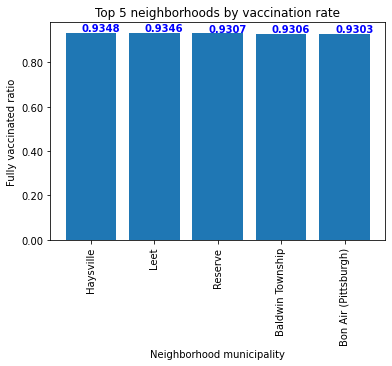

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Load the data from the CSV file
vaccinations = pd.read_csv('vaccinations.csv')

# Compute the fully vaccinated and boosted ratio
vaccinations['fully_vaccinated_and_boosted_ratio'] = (vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster']) / (vaccinations['total_partially_vaccinated'] + vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster'])

# Filter the neighborhoods with the highest ratio and plot them
top_5_vaccinations = vaccinations[vaccinations['fully_vaccinated_and_boosted_ratio'].notna()].sort_values('fully_vaccinated_and_boosted_ratio', ascending=False).iloc[1:6]

plt.bar(top_5_vaccinations['neighborhood_municipality'], top_5_vaccinations['fully_vaccinated_and_boosted_ratio'])
plt.xticks(rotation=90)
plt.ylabel('Fully vaccinated ratio')
plt.xlabel('Neighborhood municipality')
plt.title('Top 5 neighborhoods by vaccination rate')

# Set the format of the y-axis tick labels
formatter = ticker.FormatStrFormatter('%.2f')
plt.gca().yaxis.set_major_formatter(formatter)

# Add the ratio number over the bars
for i, v in enumerate(top_5_vaccinations['fully_vaccinated_and_boosted_ratio']):
    plt.text(i - 0.15, v + 0.005, str(round(v, 4)), color='blue', fontweight='bold')

plt.show()


The neighborhood with the highest ratio per vaccination per person is Haysville, with a rate of 0.9348.

#### Lowest vaccination rates for the bottom 5 neighborhoods in a list

In [2]:
import pandas as pd

# Load the data from the CSV file
vaccinations = pd.read_csv('vaccinations.csv')

# Compute the fully vaccinated and boosted ratio
vaccinations['fully_vaccinated_and_boosted_ratio'] = (vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster']) / (vaccinations['total_partially_vaccinated'] + vaccinations['total_fully_vaccinated'] + vaccinations['total_fully_vaccinated_w_booster'])

# Filter the neighborhoods with the lowest ratio and create a list
bottom_10_vaccinations = vaccinations[vaccinations['fully_vaccinated_and_boosted_ratio'].notna() & (vaccinations['neighborhood_municipality'] != 'Mcdonald')].sort_values('fully_vaccinated_and_boosted_ratio', ascending=True).iloc[:10][['neighborhood_municipality', 'fully_vaccinated_and_boosted_ratio']]

# Set the format of the ratios
pd.options.display.float_format = '{:.4f}'.format

# Print the list of neighborhoods with their corresponding ratios
print('Bottom 10 neighborhoods by vaccination rate:')
print(bottom_10_vaccinations.to_string(index=False))


Bottom 10 neighborhoods by vaccination rate:
             neighborhood_municipality  fully_vaccinated_and_boosted_ratio
              South Shore (Pittsburgh)                              0.7227
        Northview Heights (Pittsburgh)                              0.7719
                Shadyside (Pittsburgh)                              0.7843
Central Business District (Pittsburgh)                              0.7885
            North Oakland (Pittsburgh)                              0.7895
        Arlington Heights (Pittsburgh)                              0.7909
          Central Oakland (Pittsburgh)                              0.7979
           Strip District (Pittsburgh)                              0.8024
                    Bluff (Pittsburgh)                              0.8031
                              Emsworth                              0.8058


In [ ]:
The neighborhood with the lowest ratio per vaccination per person is South Shore, with a rate of 0.7227.

# Conclusion

#### After creating data visualizations and viewing the COVID-19 vaccination per neighborhood data, I can deduce that:

The best neighborhood to live in according to COVID-19 vaccination data is Haysville: 0.9348. 

The worst neighborhood to live in according to COVID-19 vaccination data is South Shore: 0.7227.

The difference between the two ratios is 0.9348 - 0.7227 = 0.2121.